Install libraries

In [2]:
%pip install torch torchvision albumentations opencv-python pandas pillow tqdm matplotlib


   ---------------------------------------- 0.0/204.2 MB ? eta -:--:--
   ---------------------------------------- 1.0/204.2 MB 6.3 MB/s eta 0:00:33
    --------------------------------------- 3.4/204.2 MB 9.6 MB/s eta 0:00:21
   - -------------------------------------- 5.8/204.2 MB 10.3 MB/s eta 0:00:20
   - -------------------------------------- 8.1/204.2 MB 10.5 MB/s eta 0:00:19
   - -------------------------------------- 9.7/204.2 MB 9.9 MB/s eta 0:00:20
   -- ------------------------------------- 11.3/204.2 MB 9.4 MB/s eta 0:00:21
   -- ------------------------------------- 13.1/204.2 MB 9.3 MB/s eta 0:00:21
   --- ------------------------------------ 15.5/204.2 MB 9.7 MB/s eta 0:00:20
   --- ------------------------------------ 17.8/204.2 MB 9.9 MB/s eta 0:00:19
   --- ------------------------------------ 19.4/204.2 MB 9.5 MB/s eta 0:00:20
   ---- ----------------------------------- 21.2/204.2 MB 9.5 MB/s eta 0:00:20
   ---- ----------------------------------- 23.9/204.2 MB 9.6 M

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [14]:
%pip install --upgrade pip

     ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
     ------------- -------------------------- 0.6/1.8 MB 12.6 MB/s eta 0:00:01
     -------------------------------- ------- 1.5/1.8 MB 19.2 MB/s eta 0:00:01
     ---------------------------------------- 1.8/1.8 MB 16.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [10]:
%pip uninstall torch torchvision torchaudio -y
%pip cache purge  # Clears old cached packages
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Found existing installation: torch 2.6.0+cu118Note: you may need to restart the kernel to use updated packages.


You can safely remove it manually.
You can safely remove it manually.



Uninstalling torch-2.6.0+cu118:
  Successfully uninstalled torch-2.6.0+cu118
Found existing installation: torchvision 0.21.0
Uninstalling torchvision-0.21.0:
  Successfully uninstalled torchvision-0.21.0
Found existing installation: torchaudio 2.6.0+cu118
Uninstalling torchaudio-2.6.0+cu118:
  Successfully uninstalled torchaudio-2.6.0+cu118
Note: you may need to restart the kernel to use updated packages.


ERROR: Too many arguments


Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.6.0%2Bcu118-cp310-cp310-win_amd64.whl.metadata (28 kB)
  Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.6.0%2Bcu118-cp310-cp310-win_amd64.whl.metadata (6.8 kB)
Using cached https://download.pytorch.org/whl/cu118/torch-2.6.0%2Bcu118-cp310-cp310-win_amd64.whl (2728.9 MB)
   ---------------------------------------- 0.0/5.3 MB ? eta -:--:--
   ---------------------------------------- 5.3/5.3 MB 35.8 MB/s eta 0:00:00
Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.6.0%2Bcu118-cp310-cp310-win_amd64.whl (4.0 MB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
%pip uninstall torch torchvision torchaudio -y
%pip cache purge


Note: you may need to restart the kernel to use updated packages.


Files removed: 0 (0 bytes)
Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121


Looking in indexes: https://download.pytorch.org/whl/cu121
  Using cached https://download.pytorch.org/whl/cu121/torchaudio-2.5.1%2Bcu121-cp310-cp310-win_amd64.whl (4.1 MB)
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
     ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
     --------------- ------------------------ 1.6/4.1 MB 9.4 MB/s eta 0:00:01
     ----------------------------------- ---- 3.7/4.1 MB 10.9 MB/s eta 0:00:01
     ---------------------------------------- 4.1/4.1 MB 10.3 MB/s eta 0:00:00
     ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
     ---------------------- ----------------- 2.4/4.1 MB 11.2 MB/s eta 0:00:01
     ---------------------------------------- 4.1/4.1 MB 11.7 MB/s eta 0:00:00
     ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
     ------------------------- -------------- 2.6/4.1 MB 12.5 MB/s eta 0:

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [23]:
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118
Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch
print(torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

True
Using device: cuda


In [4]:
TRAIN_IMG_DIR = "./carvana-image-masking-challenge/train/train"  # Folder containing training images
TRAIN_MASK_DIR = "./carvana-image-masking-challenge/train_masks/train_masks"  # Folder containing masks in .gif format
TEST_IMG_DIR = "./carvana-image-masking-challenge/test/test"  # Folder containing test images for prediction
TRAIN_MASKS_CSV = "./train_masks.csv"  # CSV file with run-length encoded masks
METADATA_CSV = "./metadata.csv"  # CSV file containing metadata information
SAMPLE_SUBMISSION_CSV = "./sample_submission.csv"  # Example of submission format

In [7]:
class CarvanaDataset(Dataset):
    def __init__(self, image_dir, mask_dir=None, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = [f for f in os.listdir(image_dir) if f.endswith(".jpg")]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        img_path = os.path.join(self.image_dir, self.images[index])
        image = np.array(Image.open(img_path).convert("RGB"))
        
        if self.mask_dir:
            mask_path = os.path.join(self.mask_dir, self.images[index].replace(".jpg", "_mask.gif"))
            mask = np.array(Image.open(mask_path).convert("L"), dtype=np.float32) / 255.0
            
            # The key fix: ensure mask has same shape as image
            if image.shape[0] != mask.shape[0] or image.shape[1] != mask.shape[1]:
                mask = cv2.resize(mask, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)
            
            if self.transform:
                augmented = self.transform(image=image, mask=mask)
                image = augmented["image"]
                mask = augmented["mask"]
            
            # Make sure mask has channel dimension (1, H, W)
            if len(mask.shape) == 2:
                mask = mask.unsqueeze(0)
                
            return image, mask
        else:
            if self.transform:
                augmented = self.transform(image=image)
                image = augmented["image"]
            return image

In [8]:
IMAGE_SIZE = 256
train_transform = A.Compose([
    A.Resize(IMAGE_SIZE, IMAGE_SIZE),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    ToTensorV2(),
], is_check_shapes=False)  # Disable shape check as we ensure shapes manually

val_transform = A.Compose([
    A.Resize(IMAGE_SIZE, IMAGE_SIZE),
    A.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    ToTensorV2(),
], is_check_shapes=False)  # Disable shape check as we ensure shapes manually


In [9]:
class UNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=1):
        super(UNet, self).__init__()
        
        def conv_block(in_channels, out_channels):
            return nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
                nn.ReLU(inplace=True),
                nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
                nn.ReLU(inplace=True),
            )

        self.encoder = nn.Sequential(
            conv_block(3, 64),
            nn.MaxPool2d(2),
            conv_block(64, 128),
            nn.MaxPool2d(2),
            conv_block(128, 256),
        )

        self.decoder = nn.Sequential(
            conv_block(256, 128),
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),
            conv_block(64, 64),
            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),
            nn.Conv2d(32, out_channels, kernel_size=1),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [10]:
def train_fn(loader, model, optimizer, loss_fn, device):
    model.train()
    loop = tqdm(loader, desc="Training", leave=True)
    total_loss = 0

    for images, masks in loop:
        images, masks = images.to(device), masks.to(device)

        optimizer.zero_grad()
        predictions = model(images)
        loss = loss_fn(predictions, masks)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        loop.set_postfix(loss=loss.item())
    
    return total_loss / len(loader)

In [11]:
def eval_fn(loader, model, loss_fn, device):
    model.eval()
    dice_score = 0
    loop = tqdm(loader, desc="Evaluating", leave=True)

    with torch.no_grad():
        for images, masks in loop:
            images, masks = images.to(device), masks.to(device)
            predictions = model(images)
            
            # Apply sigmoid since we removed it from the model
            preds = torch.sigmoid(predictions)
            
            # Calculate Dice score: 2*|X∩Y|/(|X|+|Y|)
            preds = (preds > 0.5).float()
            intersection = (preds * masks).sum(dim=(1,2,3))
            union = preds.sum(dim=(1,2,3)) + masks.sum(dim=(1,2,3))
            
            # Add small epsilon to avoid division by zero
            dice = (2. * intersection + 1e-8) / (union + 1e-8)
            dice_score += dice.mean()
    
    return dice_score / len(loader)

In [12]:
def visualize_prediction(model, dataset, idx=0, device=device):
    model.eval()
    with torch.no_grad():
        image, mask = dataset[idx]
        image_tensor = image.unsqueeze(0).to(device)
        prediction = torch.sigmoid(model(image_tensor))
        prediction = (prediction > 0.5).float()
        
        # Convert tensors to numpy for visualization
        image = image.permute(1, 2, 0).cpu().numpy()
        image = (image * 0.5 + 0.5).clip(0, 1)  # Denormalize
        mask = mask.permute(1, 2, 0).cpu().numpy()
        pred = prediction[0].permute(1, 2, 0).cpu().numpy()
        
        # Plot
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        axes[0].imshow(image)
        axes[0].set_title("Image")
        axes[0].axis("off")
        
        axes[1].imshow(mask, cmap="gray")
        axes[1].set_title("True Mask")
        axes[1].axis("off")
        
        axes[2].imshow(pred, cmap="gray")
        axes[2].set_title("Predicted Mask")
        axes[2].axis("off")
        
        plt.tight_layout()
        plt.show()


In [13]:
class SubsetCarvanaDataset(CarvanaDataset):
    def __init__(self, image_dir, mask_dir, transform, image_list):
        super().__init__(image_dir, mask_dir, transform)
        self.images = image_list

In [14]:
def get_train_val_datasets(train_dir, mask_dir, train_transform, val_transform, val_split=0.1):
    all_images = [f for f in os.listdir(train_dir) if f.endswith(".jpg")]
    np.random.seed(42)  # For reproducibility
    np.random.shuffle(all_images)
    
    split_idx = int(len(all_images) * (1 - val_split))
    train_images = all_images[:split_idx]
    val_images = all_images[split_idx:]
    
    train_dataset = SubsetCarvanaDataset(train_dir, mask_dir, train_transform, train_images)
    val_dataset = SubsetCarvanaDataset(train_dir, mask_dir, val_transform, val_images)
    
    return train_dataset, val_dataset


In [15]:
print("Loading dataset...")
train_dataset, val_dataset = get_train_val_datasets(
    TRAIN_IMG_DIR, TRAIN_MASK_DIR, train_transform, val_transform, val_split=0.2
)

BATCH_SIZE = 8
# Set num_workers=0 to avoid multiprocessing issues
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
print(f"Training on {len(train_dataset)} images, validating on {len(val_dataset)} images")



Loading dataset...
Training on 4070 images, validating on 1018 images


In [16]:
print("Initializing model...")
model = UNet().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.BCEWithLogitsLoss()

Initializing model...


In [17]:
print("Starting training...")
num_epochs = 100
best_dice = 0.0

for epoch in range(num_epochs):
    avg_loss = train_fn(train_loader, model, optimizer, loss_fn, device)
    dice_score = eval_fn(val_loader, model, loss_fn, device)
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}, Dice Score: {dice_score:.4f}")
    
    # Save best model
    if dice_score > best_dice:
        best_dice = dice_score
        torch.save(model.state_dict(), "best_unet_carvana.pth")
        print(f"Saved new best model with Dice Score: {best_dice:.4f}")

Starting training...


Evaluating: 100%|██████████| 128/128 [00:37<00:00,  3.43it/s]


Epoch 1/100, Loss: 0.1079, Dice Score: 0.9494
Saved new best model with Dice Score: 0.9494


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.23it/s]


Epoch 2/100, Loss: 0.0334, Dice Score: 0.9814
Saved new best model with Dice Score: 0.9814


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.24it/s]


Epoch 3/100, Loss: 0.0232, Dice Score: 0.9805


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.24it/s]


Epoch 4/100, Loss: 0.0260, Dice Score: 0.9848
Saved new best model with Dice Score: 0.9848


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.22it/s]


Epoch 5/100, Loss: 0.0164, Dice Score: 0.9879
Saved new best model with Dice Score: 0.9879


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.22it/s]


Epoch 6/100, Loss: 0.0139, Dice Score: 0.9875


Evaluating: 100%|██████████| 128/128 [00:31<00:00,  4.12it/s]


Epoch 7/100, Loss: 0.0156, Dice Score: 0.9766


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.22it/s]


Epoch 8/100, Loss: 0.0143, Dice Score: 0.9885
Saved new best model with Dice Score: 0.9885


Evaluating: 100%|██████████| 128/128 [00:32<00:00,  3.95it/s]


Epoch 9/100, Loss: 0.0120, Dice Score: 0.9862


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.19it/s]


Epoch 10/100, Loss: 0.0112, Dice Score: 0.9906
Saved new best model with Dice Score: 0.9906


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.18it/s]


Epoch 11/100, Loss: 0.0113, Dice Score: 0.9902


Evaluating: 100%|██████████| 128/128 [00:31<00:00,  4.08it/s]


Epoch 12/100, Loss: 0.0160, Dice Score: 0.9873


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.17it/s]


Epoch 13/100, Loss: 0.0112, Dice Score: 0.9906
Saved new best model with Dice Score: 0.9906


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.20it/s]


Epoch 14/100, Loss: 0.0097, Dice Score: 0.9904


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.22it/s]


Epoch 15/100, Loss: 0.0098, Dice Score: 0.9907
Saved new best model with Dice Score: 0.9907


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.23it/s]


Epoch 16/100, Loss: 0.0098, Dice Score: 0.9913
Saved new best model with Dice Score: 0.9913


Evaluating: 100%|██████████| 128/128 [00:32<00:00,  3.99it/s]


Epoch 17/100, Loss: 0.0091, Dice Score: 0.9670


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.19it/s]


Epoch 18/100, Loss: 0.0115, Dice Score: 0.9901


Evaluating: 100%|██████████| 128/128 [00:32<00:00,  3.95it/s]


Epoch 19/100, Loss: 0.0101, Dice Score: 0.9905


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.18it/s]


Epoch 20/100, Loss: 0.0098, Dice Score: 0.9911


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.23it/s]


Epoch 21/100, Loss: 0.0088, Dice Score: 0.9916
Saved new best model with Dice Score: 0.9916


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.19it/s]


Epoch 22/100, Loss: 0.0082, Dice Score: 0.9920
Saved new best model with Dice Score: 0.9920


Evaluating: 100%|██████████| 128/128 [00:40<00:00,  3.18it/s]


Epoch 23/100, Loss: 0.0080, Dice Score: 0.9920


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.26it/s]


Epoch 24/100, Loss: 0.0202, Dice Score: 0.9882


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.25it/s]


Epoch 25/100, Loss: 0.0102, Dice Score: 0.9911


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.25it/s]


Epoch 26/100, Loss: 0.0087, Dice Score: 0.9914


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.22it/s]


Epoch 27/100, Loss: 0.0079, Dice Score: 0.9918


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.23it/s]


Epoch 28/100, Loss: 0.0079, Dice Score: 0.9923
Saved new best model with Dice Score: 0.9923


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.21it/s]


Epoch 29/100, Loss: 0.0078, Dice Score: 0.9924
Saved new best model with Dice Score: 0.9924


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.23it/s]


Epoch 30/100, Loss: 0.0081, Dice Score: 0.9915


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.24it/s]


Epoch 31/100, Loss: 0.0075, Dice Score: 0.9923


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.21it/s]


Epoch 32/100, Loss: 0.0081, Dice Score: 0.9919


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.21it/s]


Epoch 33/100, Loss: 0.0076, Dice Score: 0.9922


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.23it/s]


Epoch 34/100, Loss: 0.0074, Dice Score: 0.9928
Saved new best model with Dice Score: 0.9928


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.19it/s]


Epoch 35/100, Loss: 0.0071, Dice Score: 0.9917


Evaluating: 100%|██████████| 128/128 [00:31<00:00,  4.08it/s]


Epoch 36/100, Loss: 0.0069, Dice Score: 0.9924


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.19it/s]


Epoch 37/100, Loss: 0.0091, Dice Score: 0.9933
Saved new best model with Dice Score: 0.9933


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.21it/s]


Epoch 38/100, Loss: 0.0071, Dice Score: 0.9927


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.24it/s]


Epoch 39/100, Loss: 0.0067, Dice Score: 0.9927


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.23it/s]


Epoch 40/100, Loss: 0.0068, Dice Score: 0.9913


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.23it/s]


Epoch 41/100, Loss: 0.0066, Dice Score: 0.9932


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.22it/s]


Epoch 42/100, Loss: 0.0168, Dice Score: 0.9893


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.24it/s]


Epoch 43/100, Loss: 0.0087, Dice Score: 0.9923


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.23it/s]


Epoch 44/100, Loss: 0.0078, Dice Score: 0.9923


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.24it/s]


Epoch 45/100, Loss: 0.0071, Dice Score: 0.9932


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.22it/s]


Epoch 46/100, Loss: 0.0070, Dice Score: 0.9924


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.21it/s]


Epoch 47/100, Loss: 0.0070, Dice Score: 0.9925


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.20it/s]


Epoch 48/100, Loss: 0.0066, Dice Score: 0.9923


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.21it/s]


Epoch 49/100, Loss: 0.0064, Dice Score: 0.9925


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.23it/s]


Epoch 50/100, Loss: 0.0063, Dice Score: 0.9934
Saved new best model with Dice Score: 0.9934


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.22it/s]


Epoch 51/100, Loss: 0.0069, Dice Score: 0.9924


Evaluating: 100%|██████████| 128/128 [00:32<00:00,  3.93it/s]


Epoch 52/100, Loss: 0.0064, Dice Score: 0.9934


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.24it/s]


Epoch 53/100, Loss: 0.0063, Dice Score: 0.9926


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.22it/s]


Epoch 54/100, Loss: 0.0062, Dice Score: 0.9936
Saved new best model with Dice Score: 0.9936


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.19it/s]


Epoch 55/100, Loss: 0.0079, Dice Score: 0.9931


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.22it/s]


Epoch 56/100, Loss: 0.0064, Dice Score: 0.9932


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.22it/s]


Epoch 57/100, Loss: 0.0060, Dice Score: 0.9928


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.21it/s]


Epoch 58/100, Loss: 0.0058, Dice Score: 0.9936


Evaluating: 100%|██████████| 128/128 [00:31<00:00,  4.11it/s]


Epoch 59/100, Loss: 0.0059, Dice Score: 0.9934


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.22it/s]


Epoch 60/100, Loss: 0.0062, Dice Score: 0.9930


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.21it/s]


Epoch 61/100, Loss: 0.0061, Dice Score: 0.9932


Evaluating: 100%|██████████| 128/128 [00:31<00:00,  4.08it/s]


Epoch 62/100, Loss: 0.0064, Dice Score: 0.9935


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.15it/s]


Epoch 63/100, Loss: 0.0057, Dice Score: 0.9928


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.20it/s]


Epoch 64/100, Loss: 0.0067, Dice Score: 0.9937
Saved new best model with Dice Score: 0.9937


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.22it/s]


Epoch 65/100, Loss: 0.0058, Dice Score: 0.9938
Saved new best model with Dice Score: 0.9938


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.16it/s]


Epoch 66/100, Loss: 0.0055, Dice Score: 0.9938
Saved new best model with Dice Score: 0.9938


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.22it/s]


Epoch 67/100, Loss: 0.0055, Dice Score: 0.9934


Evaluating: 100%|██████████| 128/128 [00:32<00:00,  4.00it/s]


Epoch 68/100, Loss: 0.0055, Dice Score: 0.9933


Evaluating: 100%|██████████| 128/128 [00:31<00:00,  4.05it/s]


Epoch 69/100, Loss: 0.0063, Dice Score: 0.9925


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.21it/s]


Epoch 70/100, Loss: 0.0063, Dice Score: 0.9919


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.21it/s]


Epoch 71/100, Loss: 0.0060, Dice Score: 0.9934


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.21it/s]


Epoch 72/100, Loss: 0.0054, Dice Score: 0.9937


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.16it/s]


Epoch 73/100, Loss: 0.0052, Dice Score: 0.9935


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.22it/s]


Epoch 74/100, Loss: 0.0054, Dice Score: 0.9934


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.20it/s]


Epoch 75/100, Loss: 0.0052, Dice Score: 0.9931


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.23it/s]


Epoch 76/100, Loss: 0.0075, Dice Score: 0.9915


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.22it/s]


Epoch 77/100, Loss: 0.0057, Dice Score: 0.9931


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.22it/s]


Epoch 78/100, Loss: 0.0052, Dice Score: 0.9935


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.16it/s]


Epoch 79/100, Loss: 0.0052, Dice Score: 0.9938


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.21it/s]


Epoch 80/100, Loss: 0.0051, Dice Score: 0.9936


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.20it/s]


Epoch 81/100, Loss: 0.0049, Dice Score: 0.9938


Evaluating: 100%|██████████| 128/128 [00:31<00:00,  4.04it/s]


Epoch 82/100, Loss: 0.0049, Dice Score: 0.9937


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.20it/s]


Epoch 83/100, Loss: 0.0050, Dice Score: 0.9935


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.21it/s]


Epoch 84/100, Loss: 0.0052, Dice Score: 0.9937


Evaluating: 100%|██████████| 128/128 [00:30<00:00,  4.22it/s]


Epoch 85/100, Loss: 0.0048, Dice Score: 0.9932


Evaluating: 100%|██████████| 128/128 [00:34<00:00,  3.71it/s]


Epoch 86/100, Loss: 0.0055, Dice Score: 0.9940
Saved new best model with Dice Score: 0.9940


Evaluating: 100%|██████████| 128/128 [00:36<00:00,  3.55it/s]


Epoch 87/100, Loss: 0.0048, Dice Score: 0.9937


Training:   7%|▋         | 34/509 [00:14<03:16,  2.42it/s, loss=0.00566]


MemoryError: Unable to allocate 7.02 MiB for an array with shape (1280, 1918, 3) and data type uint8

Saving final model...
Training completed!
Visualizing a sample prediction...


C:\Users\omars\AppData\Local\Temp\ipykernel_19844\1514773933.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_unet_carvana.pth"))


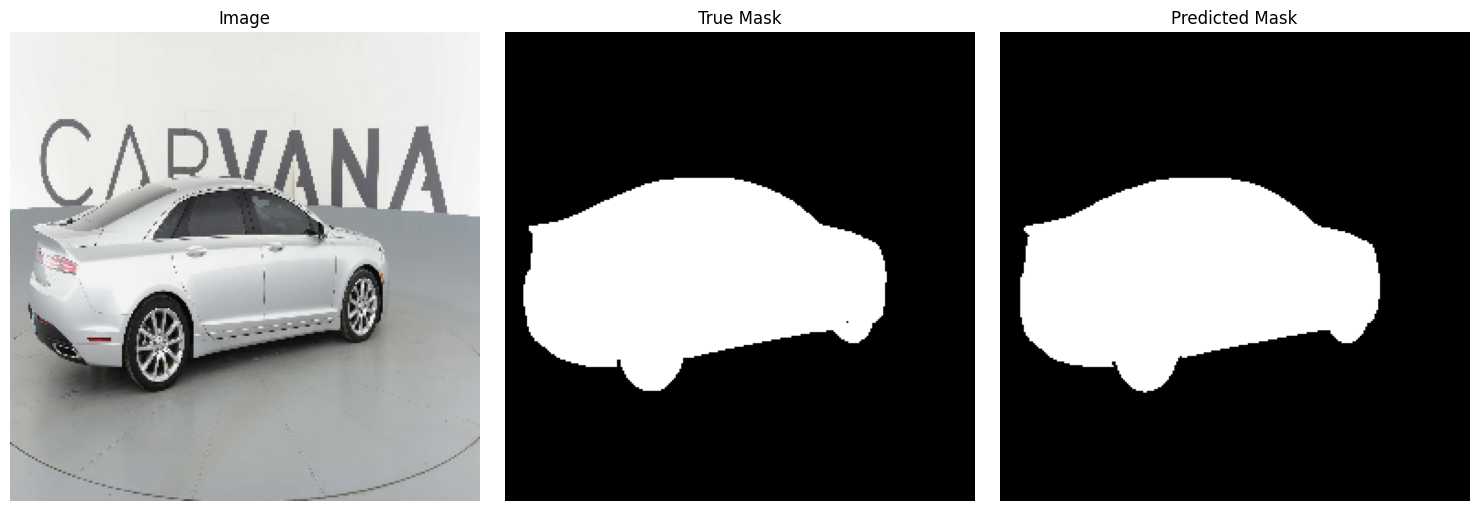

In [18]:
print("Saving final model...")
torch.save(model.state_dict(), "final_unet_carvana.pth")
print("Training completed!")

# Visualize a prediction
print("Visualizing a sample prediction...")
model.load_state_dict(torch.load("best_unet_carvana.pth"))
visualize_prediction(model, val_dataset, idx=0)

C:\Users\omars\AppData\Local\Temp\ipykernel_19844\2831896954.py:57: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_unet_carvana.pth"))


Visualizing predictions for images with indices: [159, 973, 296, 550, 577, 532]


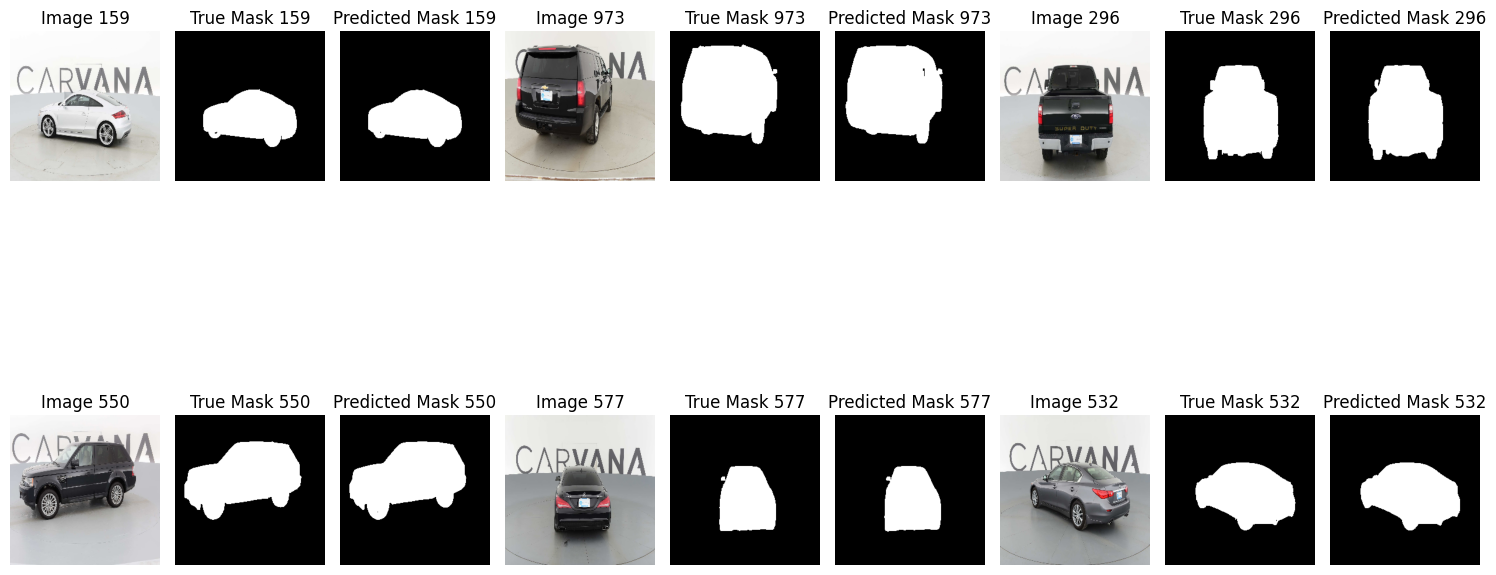

In [19]:
def visualize_multiple_predictions(model, dataset, indices, rows=2, cols=3, device=device):
    """
    Visualize multiple predictions from the model.
    
    Args:
        model: The trained UNet model
        dataset: Dataset containing images and masks
        indices: List of indices to visualize
        rows, cols: Number of rows and columns in the grid
        device: Device to run inference on
    """
    model.eval()
    fig, axes = plt.subplots(rows, cols*3, figsize=(cols*5, rows*5))
    axes = axes.reshape(rows, cols, 3)
    
    with torch.no_grad():
        for i, idx in enumerate(indices):
            if i >= rows * cols:
                break
                
            row = i // cols
            col = i % cols
            
            # Get image and mask
            image, mask = dataset[idx]
            
            # Get prediction
            image_tensor = image.unsqueeze(0).to(device)
            prediction = torch.sigmoid(model(image_tensor))
            prediction = (prediction > 0.5).float()
            
            # Convert tensors to numpy for visualization
            image = image.permute(1, 2, 0).cpu().numpy()
            image = (image * 0.5 + 0.5).clip(0, 1)  # Denormalize
            mask = mask.permute(1, 2, 0).cpu().numpy()
            pred = prediction[0].permute(1, 2, 0).cpu().numpy()
            
            # Plot results
            ax_row = axes[row, col]
            
            ax_row[0].imshow(image)
            ax_row[0].set_title(f"Image {idx}")
            ax_row[0].axis("off")
            
            ax_row[1].imshow(mask, cmap="gray")
            ax_row[1].set_title(f"True Mask {idx}")
            ax_row[1].axis("off")
            
            ax_row[2].imshow(pred, cmap="gray")
            ax_row[2].set_title(f"Predicted Mask {idx}")
            ax_row[2].axis("off")
    
    plt.tight_layout()
    plt.show()

# Load the best model
model.load_state_dict(torch.load("best_unet_carvana.pth"))

# Example usage - visualize 6 random samples
import random
random_indices = random.sample(range(len(val_dataset)), 6)
print(f"Visualizing predictions for images with indices: {random_indices}")
visualize_multiple_predictions(model, val_dataset, random_indices, rows=2, cols=3)


Finding worst predictions...
Worst predictions found at indices: [461, 624, 203, 769, 421, 585]


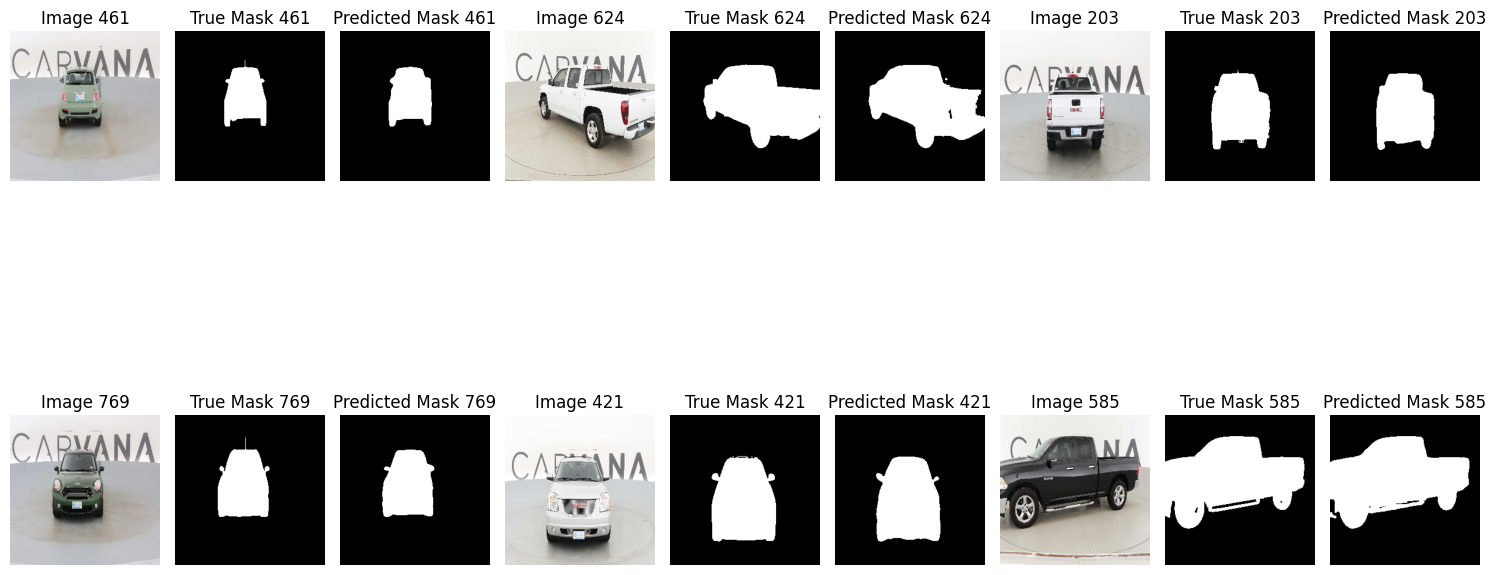

In [94]:
def find_worst_predictions(model, dataset, dataloader, device, n=6):
    """Find indices of the worst performing predictions based on Dice score"""
    model.eval()
    dice_scores = []
    
    with torch.no_grad():
        for i, (images, masks) in enumerate(dataloader):
            images, masks = images.to(device), masks.to(device)
            predictions = model(images)
            preds = torch.sigmoid(predictions) > 0.5
            
            # Calculate Dice scores for each image
            for j in range(images.size(0)):
                pred = preds[j].float()
                mask = masks[j]
                
                intersection = (pred * mask).sum().item()
                dice = (2. * intersection) / (pred.sum().item() + mask.sum().item() + 1e-8)
                dice_scores.append((i * dataloader.batch_size + j, dice))
    
    # Sort by Dice score (ascending)
    dice_scores.sort(key=lambda x: x[1])
    
    # Return indices of worst n predictions
    return [idx for idx, _ in dice_scores[:n]]

# Create a DataLoader with batch_size=1 for evaluation
from torch.utils.data import DataLoader
eval_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)

# Find and visualize worst predictions
print("Finding worst predictions...")
worst_indices = find_worst_predictions(model, val_dataset, eval_loader, device)
print(f"Worst predictions found at indices: {worst_indices}")
visualize_multiple_predictions(model, val_dataset, worst_indices, rows=2, cols=3)

C:\Users\omars\AppData\Local\Temp\ipykernel_3704\483735176.py:58: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_unet_carvana.pth"))


Visualizing predictions for images with indices: [267, 896, 919, 810, 484, 285]


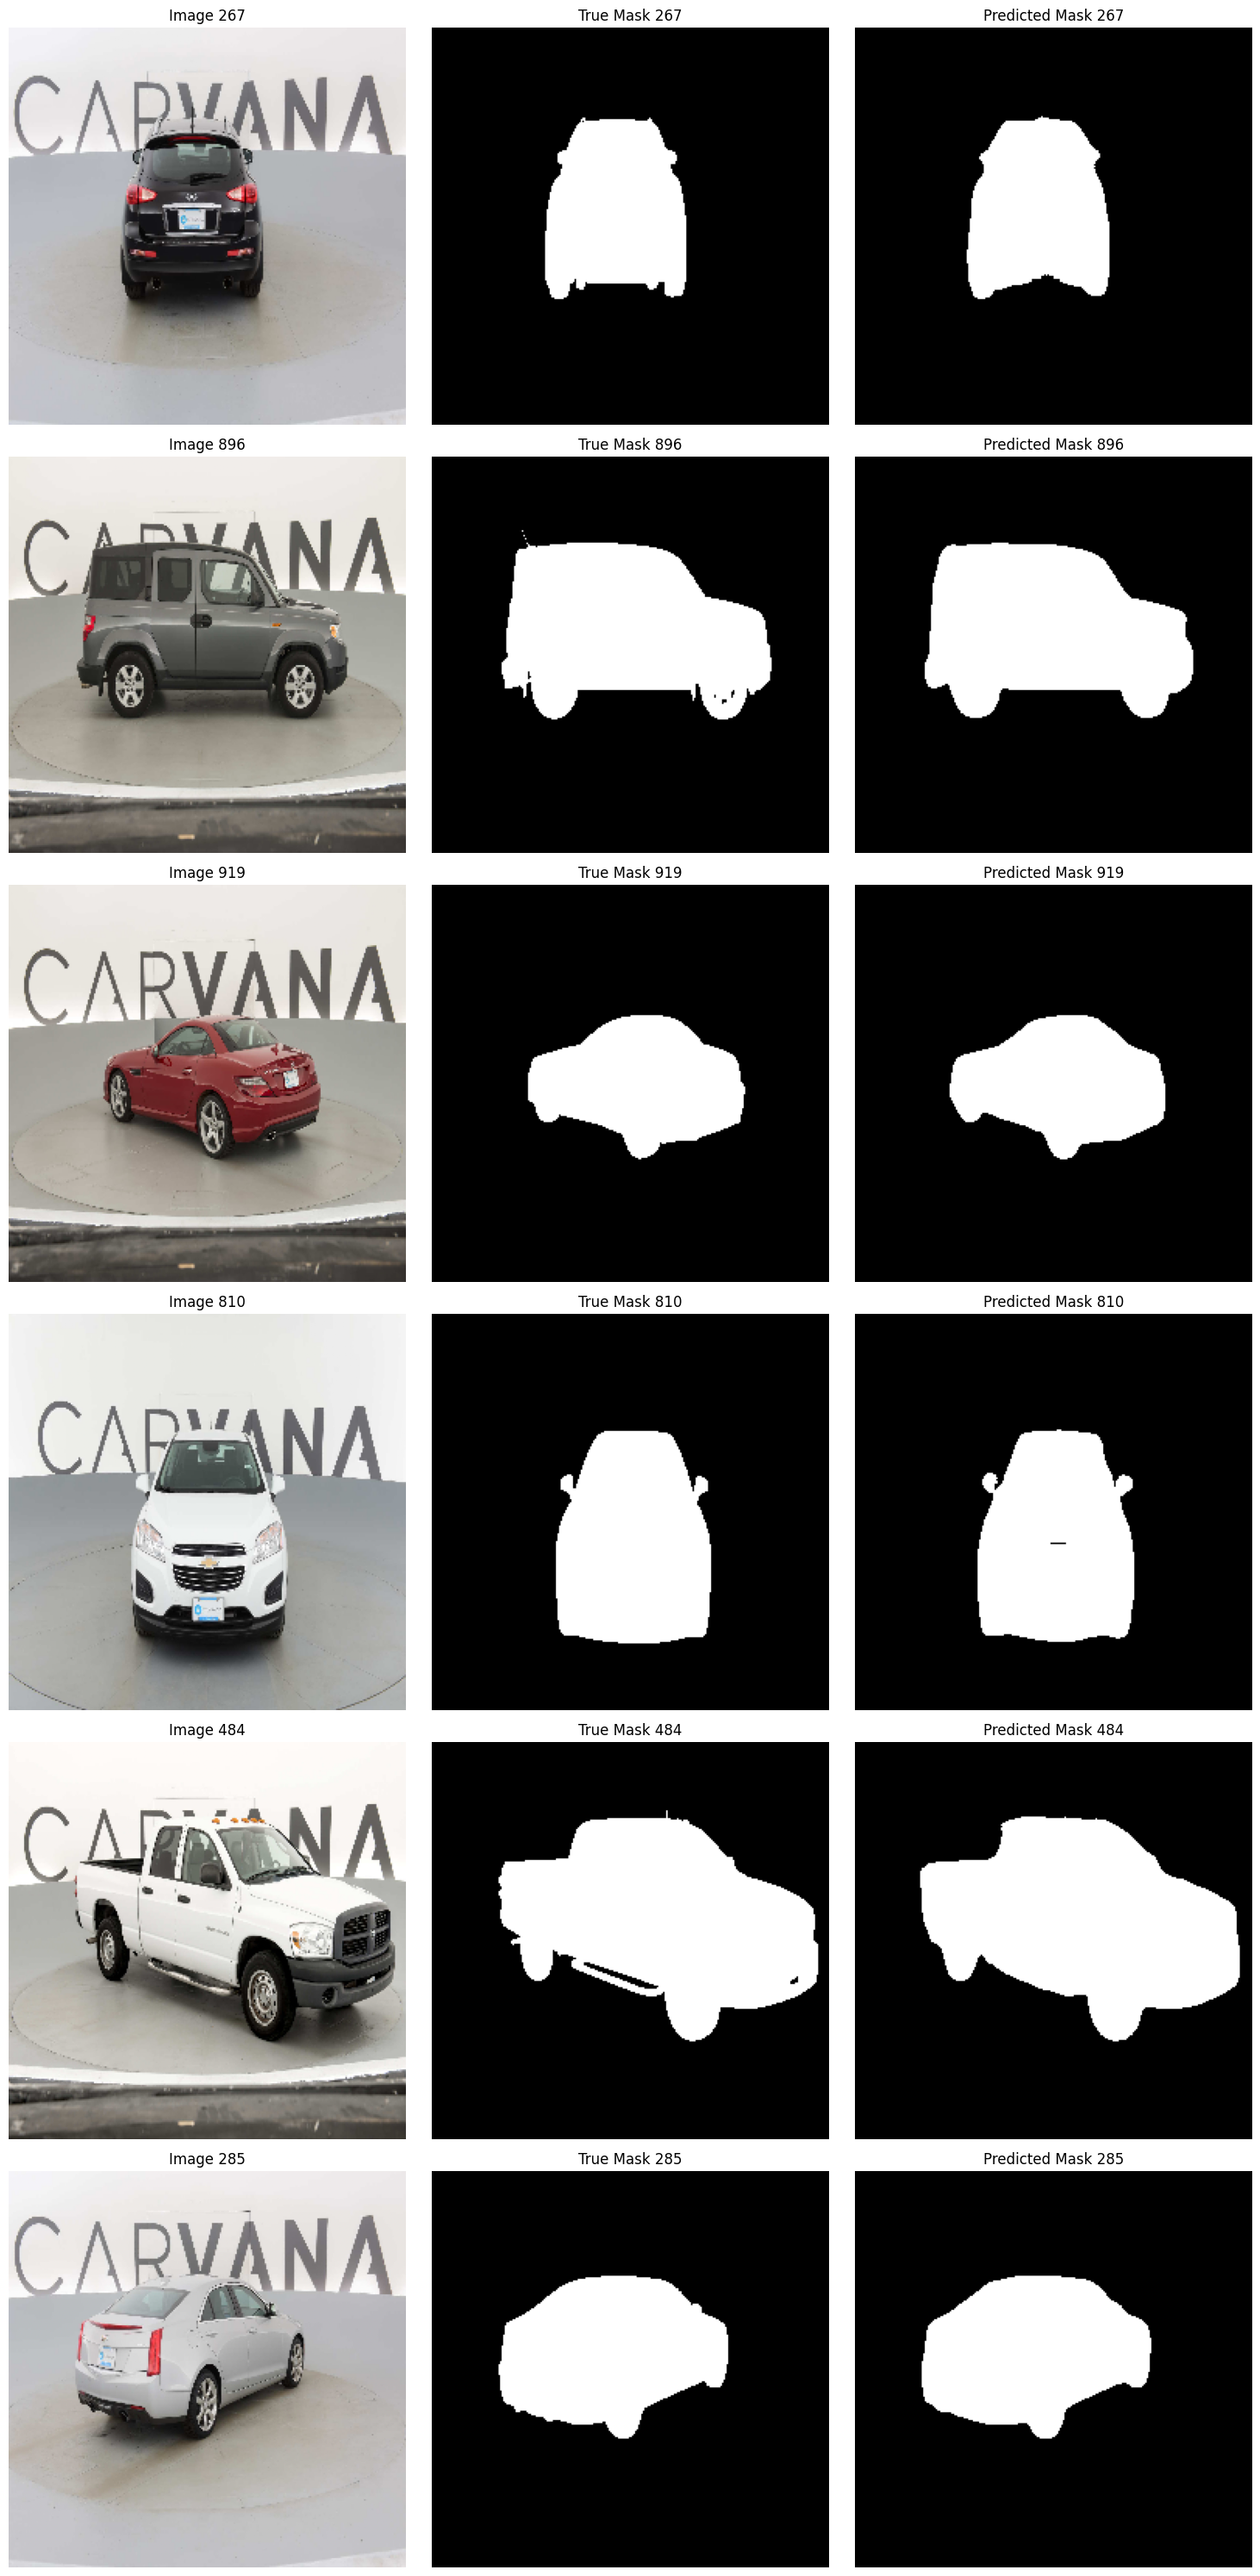

In [95]:
def visualize_multiple_predictions(model, dataset, indices, num_samples=6, device=device):
    """
    Visualize multiple predictions from the model, one sample per row.
    
    Args:
        model: The trained UNet model
        dataset: Dataset containing images and masks
        indices: List of indices to visualize
        num_samples: Number of samples to visualize
        device: Device to run inference on
    """
    model.eval()
    
    # Limit the number of samples
    indices = indices[:num_samples]
    num_to_show = len(indices)
    
    # Create figure with one row per sample
    fig, axes = plt.subplots(num_to_show, 3, figsize=(15, 5 * num_to_show))
    
    # If only one sample, make axes 2D
    if num_to_show == 1:
        axes = axes.reshape(1, 3)
    
    with torch.no_grad():
        for i, idx in enumerate(indices):
            # Get image and mask
            image, mask = dataset[idx]
            
            # Get prediction
            image_tensor = image.unsqueeze(0).to(device)
            prediction = torch.sigmoid(model(image_tensor))
            prediction = (prediction > 0.5).float()
            
            # Convert tensors to numpy for visualization
            image = image.permute(1, 2, 0).cpu().numpy()
            image = (image * 0.5 + 0.5).clip(0, 1)  # Denormalize
            mask = mask.permute(1, 2, 0).cpu().numpy()
            pred = prediction[0].permute(1, 2, 0).cpu().numpy()
            
            # Plot results
            axes[i, 0].imshow(image)
            axes[i, 0].set_title(f"Image {idx}")
            axes[i, 0].axis("off")
            
            axes[i, 1].imshow(mask, cmap="gray")
            axes[i, 1].set_title(f"True Mask {idx}")
            axes[i, 1].axis("off")
            
            axes[i, 2].imshow(pred, cmap="gray")
            axes[i, 2].set_title(f"Predicted Mask {idx}")
            axes[i, 2].axis("off")
    
    plt.tight_layout()
    plt.show()

# Load the best model
model.load_state_dict(torch.load("best_unet_carvana.pth"))

# Example usage - visualize random samples
import random
random_indices = random.sample(range(len(val_dataset)), 6)
print(f"Visualizing predictions for images with indices: {random_indices}")
visualize_multiple_predictions(model, val_dataset, random_indices)

Finding worst predictions...
Worst predictions found at indices: [19, 14, 8, 6, 18, 15]
With Dice scores: ['0.9868', '0.9870', '0.9886', '0.9887', '0.9893', '0.9895']


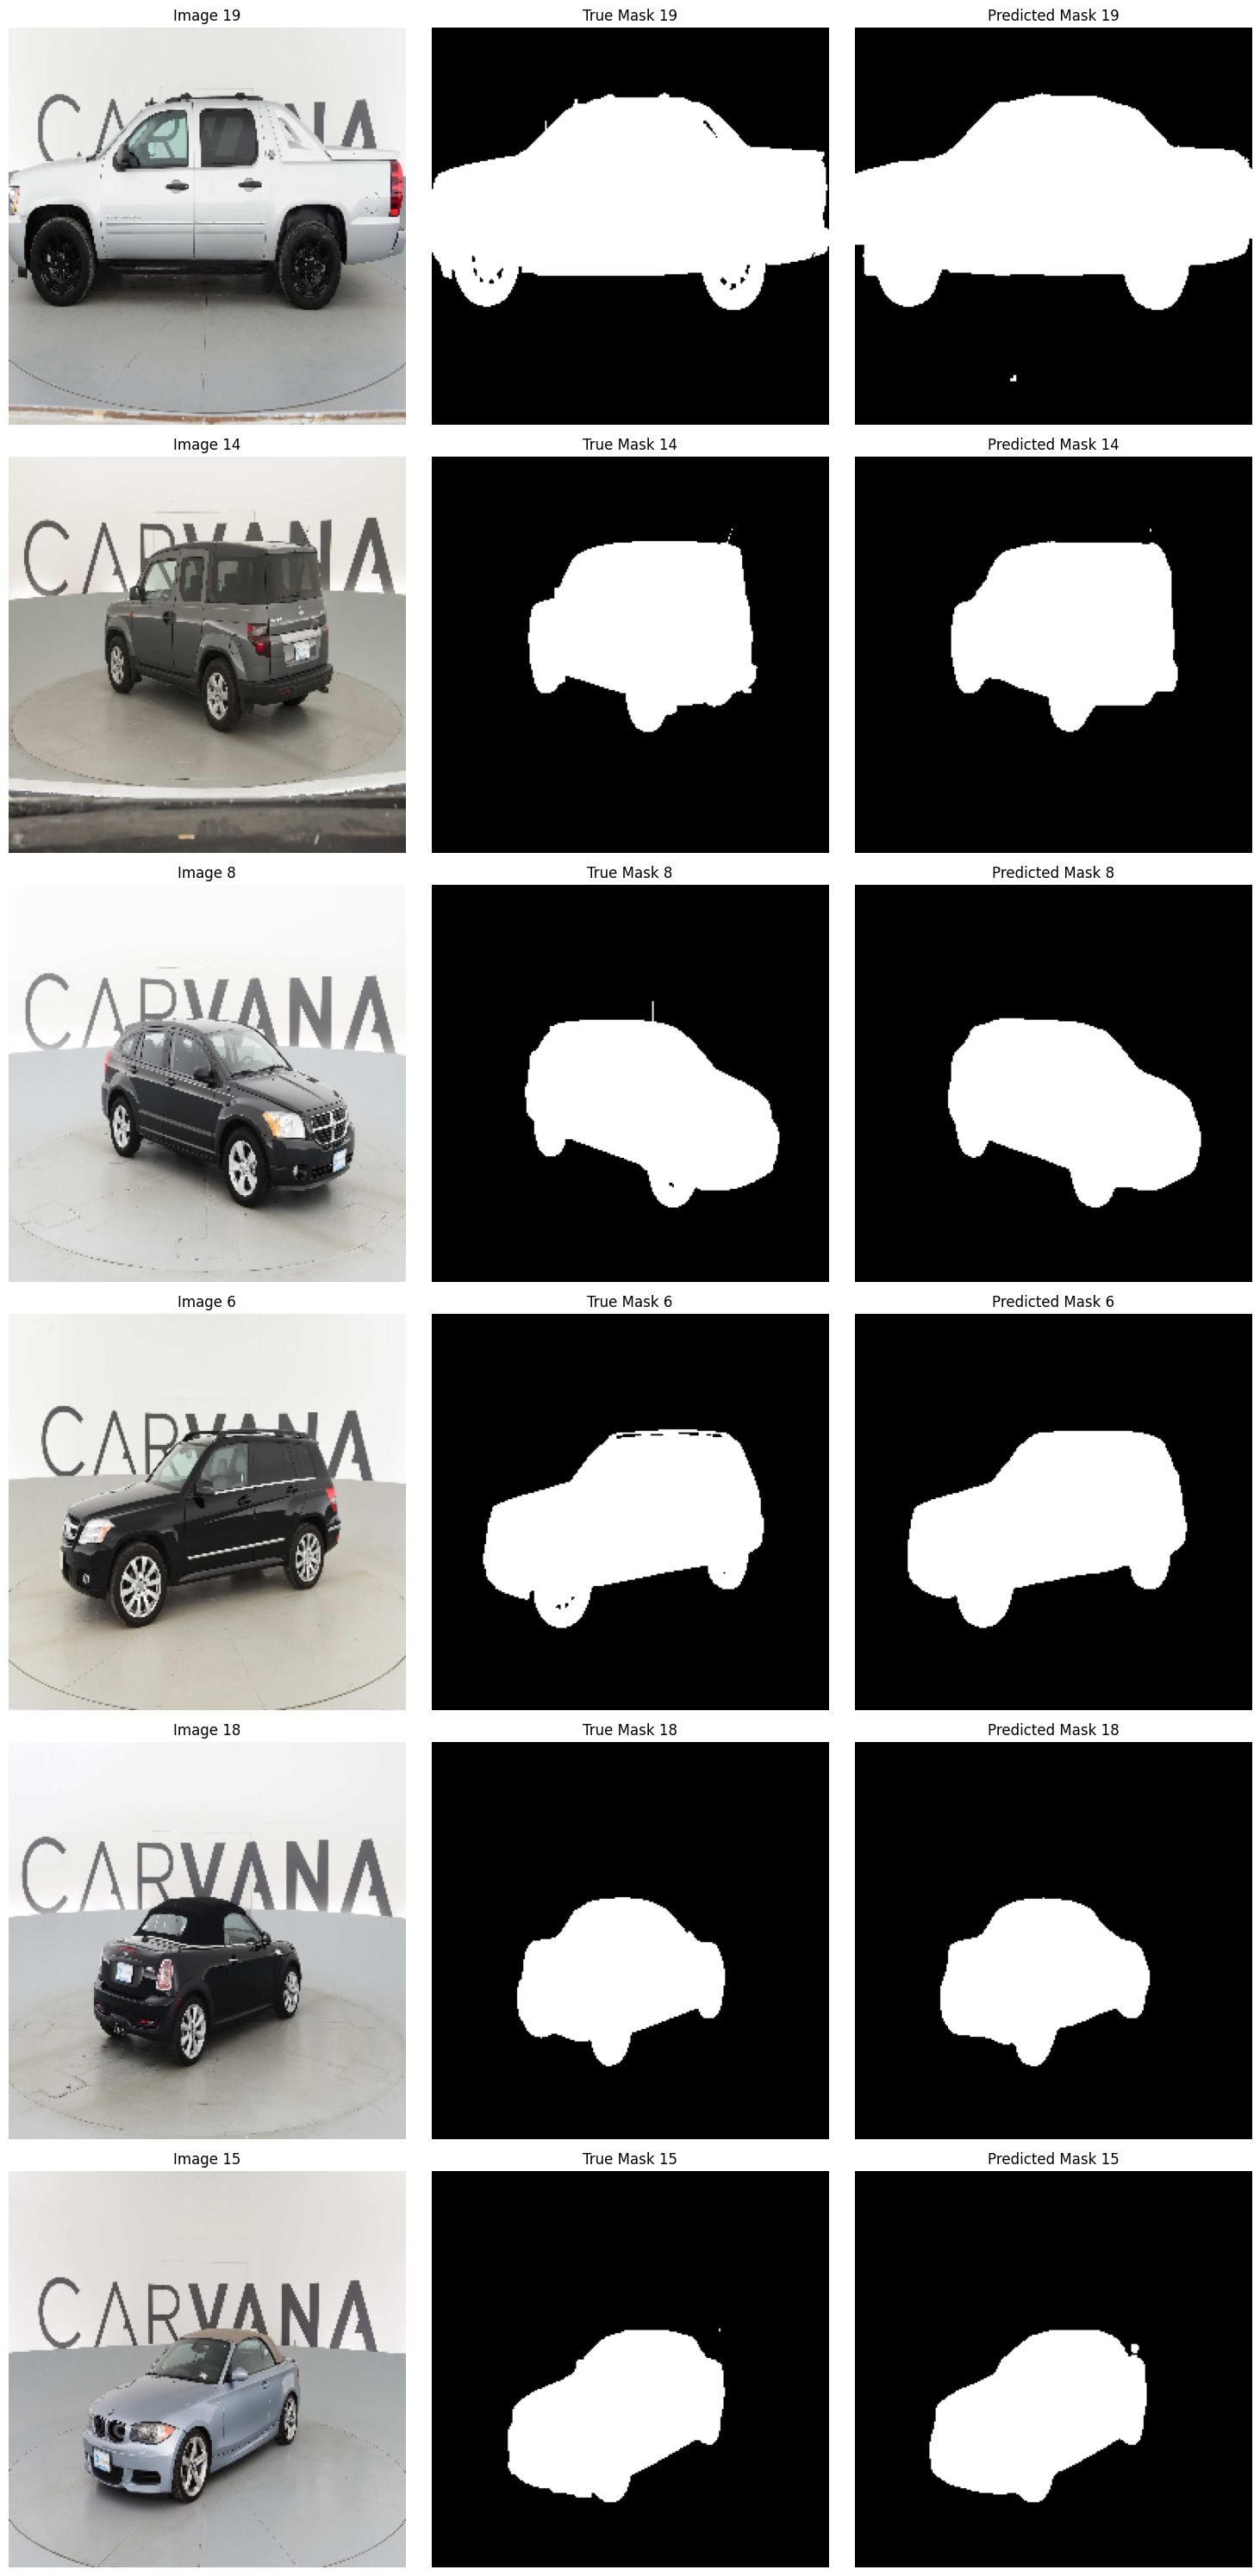

In [96]:
def find_worst_predictions(model, dataset, num_samples=20, device=device):
    """Find indices of the worst performing predictions based on Dice score"""
    model.eval()
    dice_scores = []
    
    # Create a single-sample DataLoader
    from torch.utils.data import DataLoader
    loader = DataLoader(dataset, batch_size=1, shuffle=False)
    
    with torch.no_grad():
        for i, (image, mask) in enumerate(loader):
            if i >= num_samples:  # Limit to first num_samples to save time
                break
                
            image, mask = image.to(device), mask.to(device)
            prediction = model(image)
            pred = (torch.sigmoid(prediction) > 0.5).float()
            
            # Calculate Dice score
            intersection = (pred * mask).sum().item()
            dice = (2. * intersection) / (pred.sum().item() + mask.sum().item() + 1e-8)
            dice_scores.append((i, dice))
    
    # Sort by Dice score (ascending)
    dice_scores.sort(key=lambda x: x[1])
    
    # Return indices of worst predictions
    return [idx for idx, score in dice_scores[:6]], [score for idx, score in dice_scores[:6]]

# Find and visualize worst predictions
print("Finding worst predictions...")
worst_indices, worst_scores = find_worst_predictions(model, val_dataset)
print(f"Worst predictions found at indices: {worst_indices}")
print(f"With Dice scores: {[f'{score:.4f}' for score in worst_scores]}")
visualize_multiple_predictions(model, val_dataset, worst_indices)